In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
train_data = pd.read_csv('/home/brownwalker/Kaggle/Kaggle/train.csv')
test_data = pd.read_csv('/home/brownwalker/Kaggle/Kaggle/test.csv')
print(train_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
sex_counts = train_data['Sex'].value_counts()
print(sex_counts)

Sex
male      577
female    314
Name: count, dtype: int64


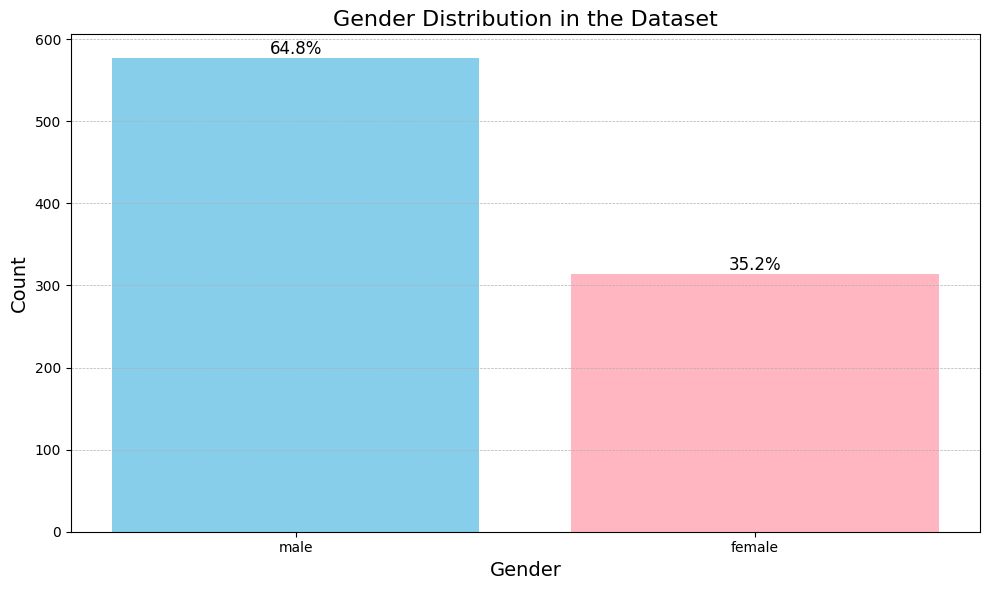

In [7]:
# Calculating percentages
total = sum(sex_counts.values)
percentages = [(count / total) * 100 for count in sex_counts.values]

# Plotting the gender distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'lightpink'])

# Adding title and labels
plt.title('Gender Distribution in the Dataset', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Adding data labels with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=12)

# Improving layout
plt.tight_layout()

# Display the plot
plt.show()


In [8]:
pclass_count = train_data['Pclass'].value_counts()
print(pclass_count)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


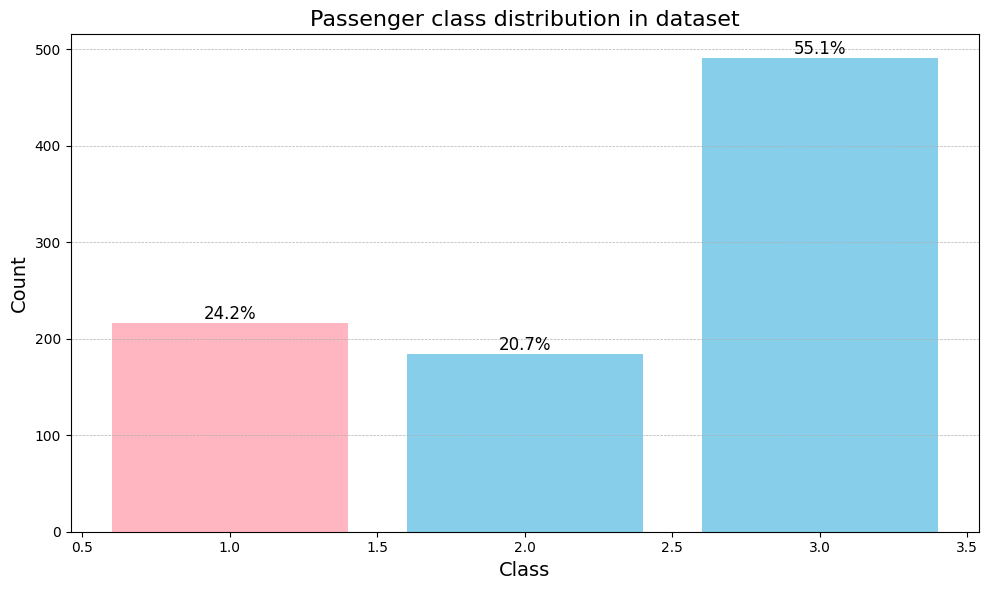

In [9]:
total_count = sum(pclass_count.values) 
percent = [(count / total_count) * 100 for count in pclass_count.values]


#plot the class distribution
plt.figure(figsize=(10,6))
bars = plt.bar(pclass_count.index, pclass_count.values, color = ['skyblue', 'lightpink'])

#adding title and labels
plt.title('Passenger class distribution in dataset', fontsize=16)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Count', fontsize=14)

#add grid lines
plt.grid(True, which ='both', linestyle='--', linewidth=0.5, axis='y')

#Adding data labels with percentages

for bar, percent in zip(bars,percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percent:.1f}%',
              ha='center', va='bottom', fontsize=12)

#imporve layout
plt.tight_layout()

#display the plot
plt.show()



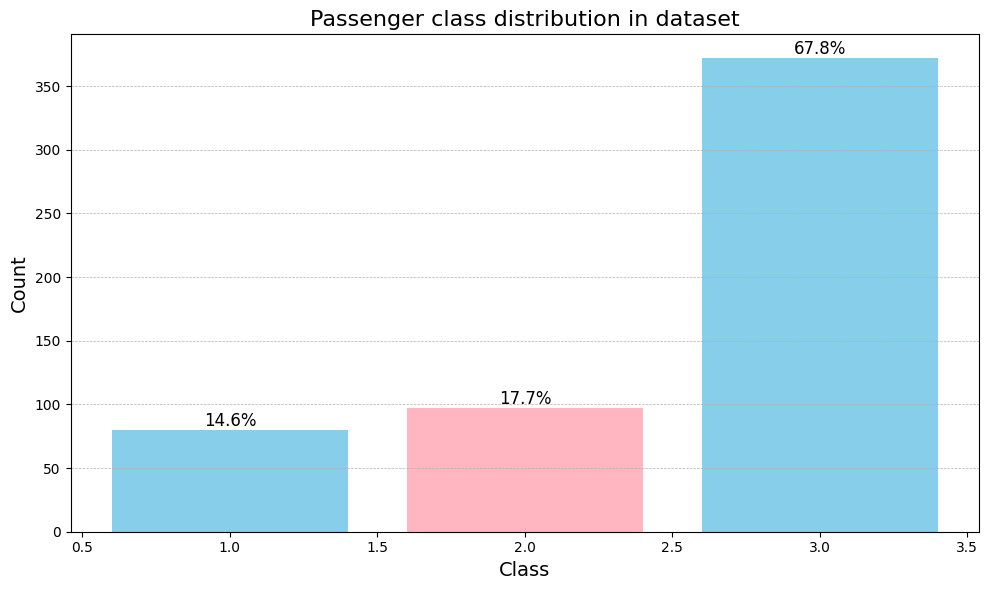

In [16]:
filtered_surv = train_data[train_data['Survived'] != 1]

f_s_count = filtered_surv['Pclass'].value_counts()

total_count = sum(f_s_count.values) 
percent = [(count / total_count) * 100 for count in f_s_count.values]


#plot the class distribution
plt.figure(figsize=(10,6))
bars = plt.bar(f_s_count.index, f_s_count.values, color = ['skyblue', 'lightpink'])

#adding title and labels
plt.title('Passenger class distribution in dataset', fontsize=16)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Count', fontsize=14)

#add grid lines
plt.grid(True, which ='both', linestyle='--', linewidth=0.5, axis='y')

#Adding data labels with percentages

for bar, percent in zip(bars,percent):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percent:.1f}%',
              ha='center', va='bottom', fontsize=12)

#imporve layout
plt.tight_layout()

#display the plot
plt.show()



In [15]:
pclass_count = train_data['Pclass'].value_counts()

f_s_count = filtered_surv['Pclass'].value_counts()

diff = pclass_count - f_s_count

print(diff)




Pclass
1    136
2     87
3    119
Name: count, dtype: int64


In [17]:
survival_rate = train_data.groupby('Pclass')['Survived'].mean()
print(survival_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


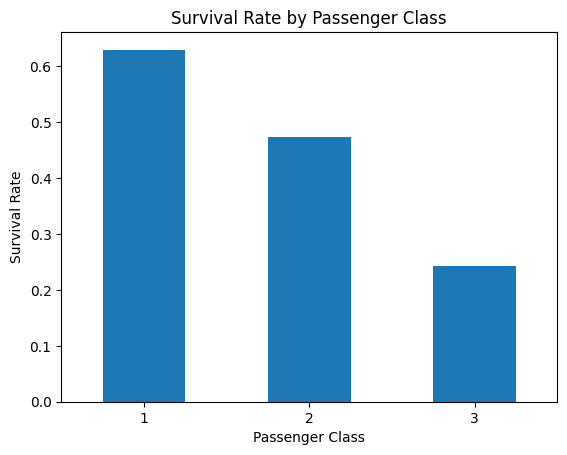

In [21]:
survival_rate.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

In [25]:
contingency_table = pd.crosstab(train_data['Pclass'], train_data['Survived'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}. p_value: {p}")

Chi-Squared Statistic: 102.88898875696056. p_value: 4.549251711298793e-23


In [31]:
import statsmodels.api as sm

X = sm.add_constant(train_data['Pclass'])
y = train_data['Survived']

model = sm.Logit(y,X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                 0.08617
Time:                        22:09:33   Log-Likelihood:                -542.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.885e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4468      0.207      6.975      0.000       1.040       1.853
Pclass        -0.8501      0.

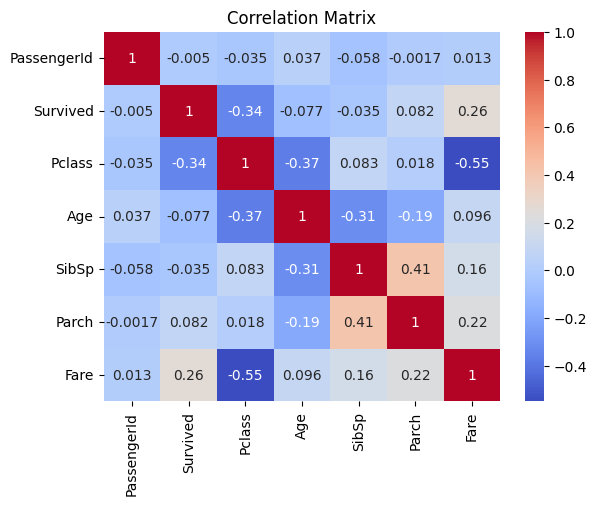

In [35]:
# Select only numeric columns for the correlation matrix
numeric_data = train_data.select_dtypes(include=[np.number])

# Now compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


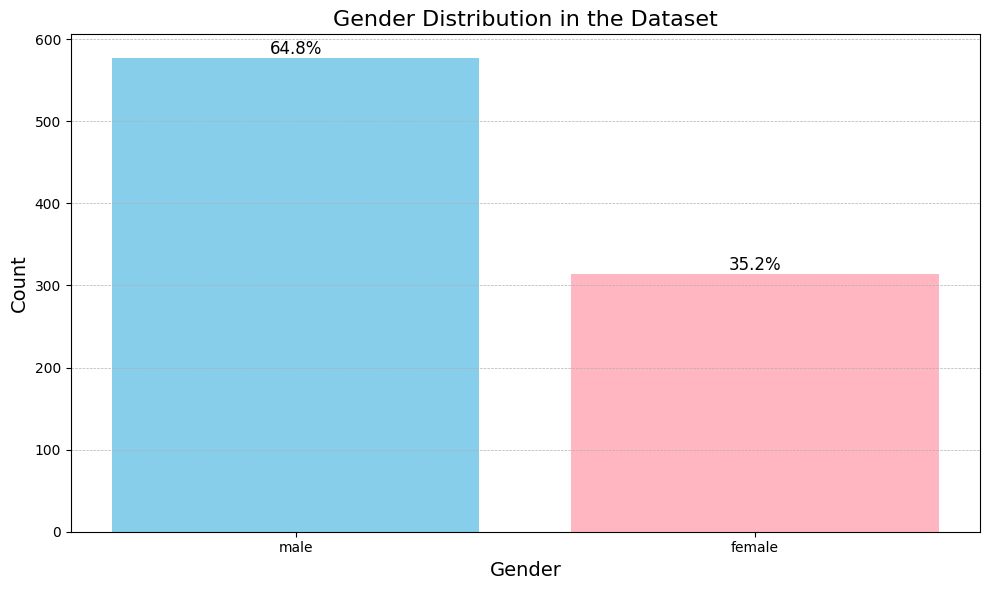

In [11]:
# Calculating percentages
total = sum(sex_counts.values)
percentages = [(count / total) * 100 for count in sex_counts.values]

# Plotting the gender distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'lightpink'])

# Adding title and labels
plt.title('Gender Distribution in the Dataset', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Adding data labels with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=12)

# Improving layout
plt.tight_layout()

# Display the plot
plt.show()


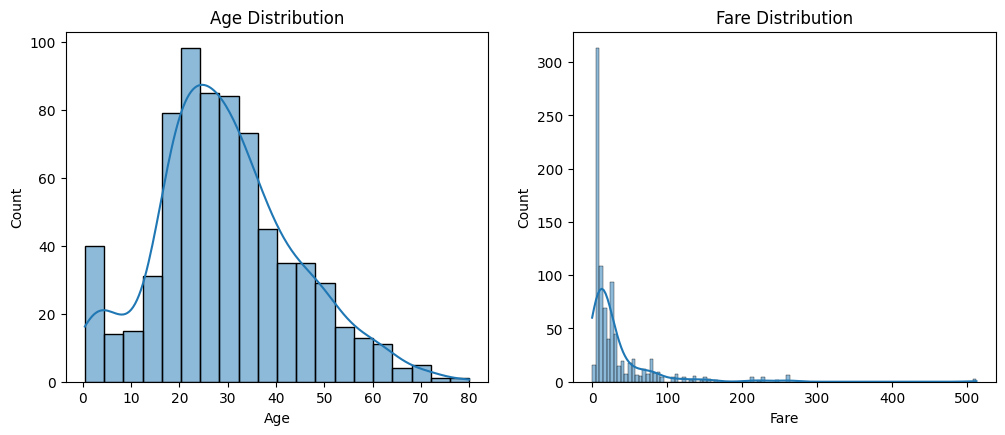

In [58]:
# Histograms for 'Age' and 'Fare'
plt.figure(figsize=(12, 10))

# Histogram for the 'Age' column
plt.subplot(2, 2, 1)
sns.histplot(train_data['Age'].dropna(), kde=True)  # Dropping NA values for accurate distribution
plt.title('Age Distribution')

# Histogram for the 'Fare' column
plt.subplot(2, 2, 2)
sns.histplot(train_data['Fare'], kde=True)
plt.title('Fare Distribution')


# Show the plots
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/home/brownwalker/Kaggle/Kaggle/train.csv')

# Handling missing values
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# Feature Engineering (example)
data['FamilySize'] = data['SibSp'] + data['Parch']

# Prepare for encoding and scaling
numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Pclass', 'Embarked']  # example categories

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Applying transformations
X = data.drop('Survived', axis=1)
y = data['Survived']
X = preprocessor.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
       

Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

